In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve , plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

In [3]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

In [4]:
c = df_train.select_dtypes(include=['object']).columns.tolist()

c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [5]:
a =[x for x in c if x!='emotion']
a

['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex']

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in a:
    df_train[i]=le.fit_transform(df_train[i])

for i in a:
    df_test[i]=le.fit_transform(df_test[i])
df_train['emotion']=le.fit_transform(df_train['emotion'])
df_test['emotion']=le.fit_transform(df_test['emotion'])    

In [7]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder

scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features


scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test



In [8]:
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])

In [9]:
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [10]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels =le.classes_)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, xticks_rotation='vertical',cmap='Greens')
    plt.show()

In [11]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.49      0.75      0.60        96
           1       0.46      0.61      0.53        96
           2       0.45      0.56      0.50        48
           3       0.55      0.38      0.45        96
           4       0.41      0.38      0.39        96
           5       0.45      0.48      0.46        48
           6       0.41      0.19      0.26        96
           7       0.55      0.48      0.51        48

    accuracy                           0.47       624
   macro avg       0.47      0.48      0.46       624
weighted avg       0.47      0.47      0.45       624



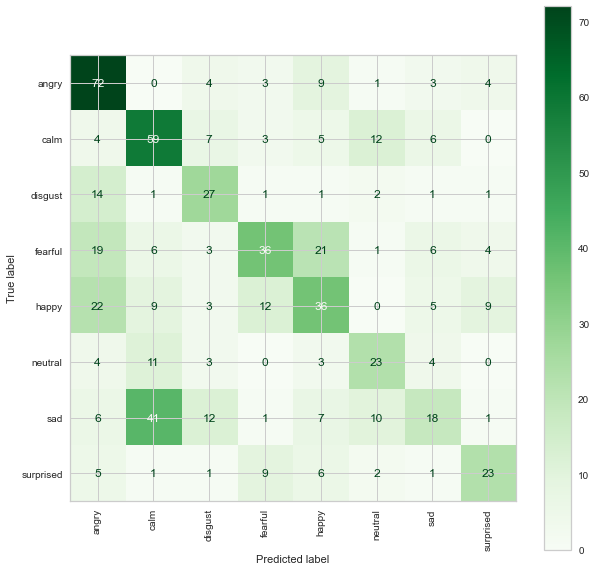

In [13]:
clf = SVC(C = 0.1  , kernel = 'linear', tol = 1.0,decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print_confMatrix(y_test,y_pred)

In [10]:
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.ensemble import RandomForestClassifier


In [11]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})


In [33]:
df = pd.DataFrame(X_res,columns=col)

In [34]:
df['emotion'] = y_res

In [17]:
le.classes_

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [35]:
df['emotion'] = df['emotion'].map({0:'angry',1:'calm',2:'disgust',3:'fearful',4:'happy',5:'neutral',6:'sad',7:'surprised'})

In [36]:
df.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,emotion
0,1.0,0.0,1.0,0.0,1.0,0.018034,0.603864,-0.063106,-0.7693,0.553248,...,0.161158,-0.925138,2.167997,1.515260,1.079945,0.690192,0.036057,9.400360,-3.035005,neutral
1,1.0,0.0,1.0,1.0,1.0,0.013950,0.603864,-0.063106,-0.7693,0.770118,...,-0.173413,1.908839,1.610931,0.996435,0.639413,0.409754,0.036057,-0.186504,0.434538,neutral
2,1.0,0.0,0.0,0.0,1.0,0.018855,0.622665,-0.063106,-0.7693,0.851346,...,-0.286208,-0.925138,1.285119,1.118715,0.877776,0.722854,0.036057,2.891302,-1.463754,neutral
3,1.0,0.0,0.0,1.0,1.0,0.018087,0.603864,-0.063106,-0.7693,1.562804,...,-0.588962,1.429546,1.176485,0.899140,0.723117,0.560400,0.036057,-0.049566,-0.052845,neutral
4,1.0,0.0,1.0,0.0,1.0,0.015921,0.603864,-0.063106,-0.7693,0.286970,...,0.170902,0.987370,1.346235,1.065980,0.761301,0.452031,0.036057,0.878701,-0.532241,calm


<AxesSubplot:title={'center':'zc_sum'}, xlabel='emotion'>

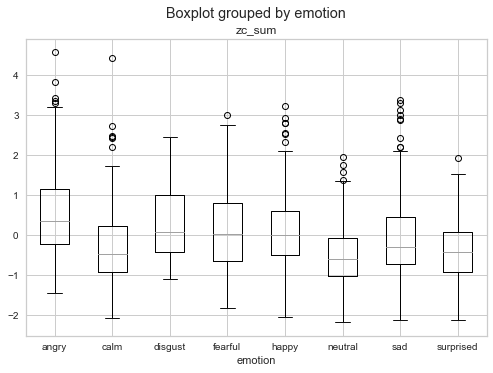

In [37]:
df.boxplot(column=['zc_sum'], by='emotion')

<AxesSubplot:title={'center':'lag1_skew'}, xlabel='emotion'>

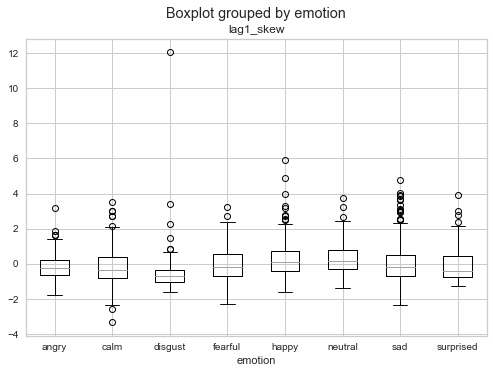

In [38]:
df.boxplot(column=['lag1_skew'], by='emotion')

In [44]:
pd.crosstab(df['emotion'],df['sex'])

sex,0.0,1.0
emotion,,
angry,127,134
calm,125,126
disgust,67,61
fearful,127,128
happy,127,122
neutral,68,72
sad,123,127
surprised,68,60


In [46]:
pd.crosstab(df['emotion'],df['emotional_intensity'])

emotional_intensity,0.0,1.0
emotion,,
angry,123,138
calm,124,127
disgust,61,67
fearful,125,130
happy,124,125
neutral,140,0
sad,117,133
surprised,61,67


In [47]:
pd.crosstab(df['emotion'],df['repetition'])

repetition,0.0,1.0
emotion,,
angry,128,133
calm,126,125
disgust,65,63
fearful,129,126
happy,122,127
neutral,70,70
sad,125,125
surprised,66,62


In [48]:
pd.crosstab(df['emotion'],df['statement'])

statement,0.0,1.0
emotion,,
angry,132,129
calm,127,124
disgust,64,64
fearful,125,130
happy,123,126
neutral,70,70
sad,121,129
surprised,63,65


In [49]:
pd.crosstab(df['emotion'],df['vocal_channel'])

vocal_channel,0.0,1.0
emotion,,
angry,126,135
calm,123,128
disgust,0,128
fearful,121,134
happy,122,127
neutral,68,72
sad,123,127
surprised,0,128


In [23]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=1000), n_features_to_select=22)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

 DT New dimension: (1662, 22)


              precision    recall  f1-score   support

           0       0.59      0.78      0.67        96
           1       0.52      0.56      0.54        96
           2       0.48      0.62      0.55        48
           3       0.40      0.32      0.36        96
           4       0.46      0.40      0.43        96
           5       0.39      0.67      0.49        48
           6       0.42      0.23      0.30        96
           7       0.66      0.48      0.55        48

    accuracy                           0.49       624
   macro avg       0.49      0.51      0.48       624
weighted avg       0.48      0.49      0.47       624



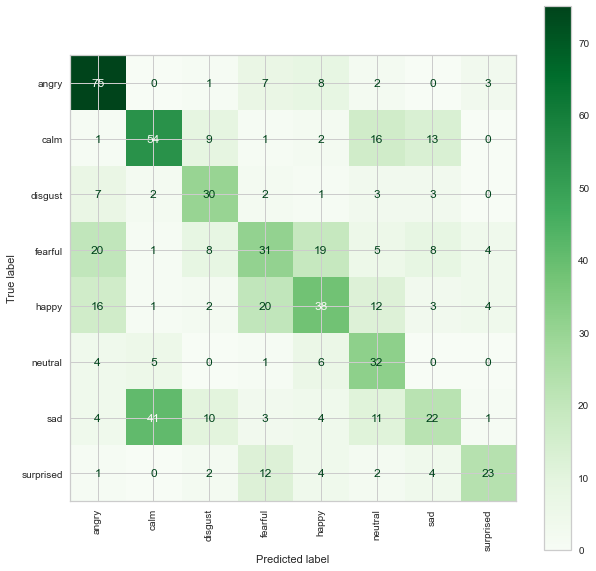

In [24]:
clf.fit(X_train_sel, y_res)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test,y_pred))
print_confMatrix(y_test,y_pred)

In [25]:
clf_random = RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=1000)
                             
clf_random.fit(X_train_sel, y_res)

y_pred = clf_random.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.48878205128205127
F1-score [0.6893617  0.57723577 0.5060241  0.31205674 0.44230769 0.36363636
 0.29139073 0.52336449]
              precision    recall  f1-score   support

           0       0.58      0.84      0.69        96
           1       0.47      0.74      0.58        96
           2       0.60      0.44      0.51        48
           3       0.49      0.23      0.31        96
           4       0.41      0.48      0.44        96
           5       0.48      0.29      0.36        48
           6       0.40      0.23      0.29        96
           7       0.47      0.58      0.52        48

    accuracy                           0.49       624
   macro avg       0.49      0.48      0.46       624
weighted avg       0.48      0.49      0.46       624



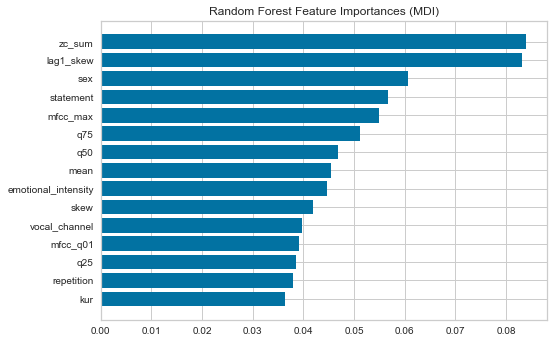

In [26]:
nbr_features = 15

tree_feature_importances = clf_random.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(col)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

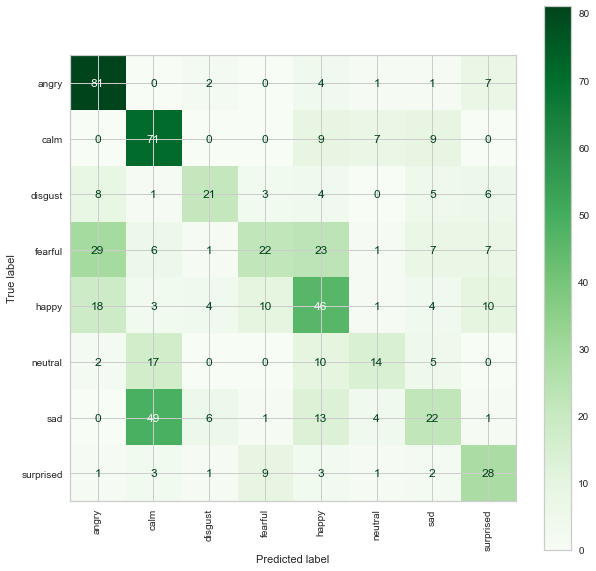

In [27]:
print_confMatrix(y_test,y_pred)

In [28]:
from sklearn.linear_model import LogisticRegression


In [31]:
clf_log = LogisticRegression(random_state=42,C=0.1,max_iter =600,solver="newton-cg",multi_class="ovr",tol=1.0)
clf_log.fit(X_train_sel, y_res)

LogisticRegression(C=0.1, max_iter=600, multi_class='ovr', random_state=42,
                   solver='newton-cg', tol=1.0)

In [32]:
y_pred = clf_log.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.483974358974359
F1-score [0.6893617  0.5412844  0.55445545 0.35365854 0.42268041 0.35789474
 0.32051282 0.51764706]
              precision    recall  f1-score   support

           0       0.58      0.84      0.69        96
           1       0.48      0.61      0.54        96
           2       0.53      0.58      0.55        48
           3       0.43      0.30      0.35        96
           4       0.42      0.43      0.42        96
           5       0.36      0.35      0.36        48
           6       0.42      0.26      0.32        96
           7       0.59      0.46      0.52        48

    accuracy                           0.48       624
   macro avg       0.48      0.48      0.47       624
weighted avg       0.47      0.48      0.47       624



In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier


clf_2 = BaggingClassifier(base_estimator= MLPClassifier(solver = 'adam', momentum = 0.1, learning_rate = 'adaptive' , hidden_layer_sizes=[32,64],activation='tanh',alpha=1.0,tol=0.0001))

clf_2.fit(X_train_sel, y_res)

y_pred = clf_2.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5128205128205128
F1-score [0.71604938 0.57276995 0.52427184 0.34355828 0.46783626 0.48739496
 0.30344828 0.57142857]
              precision    recall  f1-score   support

           0       0.59      0.91      0.72        96
           1       0.52      0.64      0.57        96
           2       0.49      0.56      0.52        48
           3       0.42      0.29      0.34        96
           4       0.53      0.42      0.47        96
           5       0.41      0.60      0.49        48
           6       0.45      0.23      0.30        96
           7       0.60      0.54      0.57        48

    accuracy                           0.51       624
   macro avg       0.50      0.52      0.50       624
weighted avg       0.50      0.51      0.49       624



In [34]:
from sklearn.ensemble import AdaBoostClassifier

clf_random_a = AdaBoostClassifier(base_estimator= RandomForestClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20,n_estimators=1000),random_state=0) 
#50
clf_random_a.fit(X_train_sel, y_res)

y_pred = clf_random_a.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5096153846153846
F1-score [0.71497585 0.54444444 0.50943396 0.38709677 0.46153846 0.51376147
 0.4021164  0.5106383 ]
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        96
           1       0.58      0.51      0.54        96
           2       0.47      0.56      0.51        48
           3       0.51      0.31      0.39        96
           4       0.43      0.50      0.46        96
           5       0.46      0.58      0.51        48
           6       0.41      0.40      0.40        96
           7       0.52      0.50      0.51        48

    accuracy                           0.51       624
   macro avg       0.51      0.52      0.51       624
weighted avg       0.51      0.51      0.50       624

